In [63]:
import random
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd 
import numpy as np 
from IPython import display 

In [70]:

def external_shock():
    return np.random.normal(1, 2) # returns a shock value according to a normal distribution 

def IS_Relationship(previous_period_real_interest_rate,stabilising_interest_rate,
             sensitivity_to_mon_pol,equilibrium_output):

    monetary_policy_decision = previous_period_real_interest_rate - stabilising_interest_rate
    output = equilibrium_output - sensitivity_to_mon_pol*(monetary_policy_decision) 
    return output 

def plot_IS_Curve():
    equilibrium_output = 100 
    stabilising_interest_rate = 5 #%
    sensitivity_to_mon_pol = 1
    output_schedule = []
    output_schedule_shock = []
    interest_rates = []
    shock_occurence = random.random()
    
    if shock_occurence > 0.8:
        shock_term = external_shock()
    else:
        shock_term = 0
    shock_test = external_shock()
        
    for previous_period_real_interest_rate in range(0,10):
        Output = IS_Relationship(previous_period_real_interest_rate,stabilising_interest_rate,
             sensitivity_to_mon_pol,equilibrium_output)
        output_schedule.append(Output)
        Output_shock = IS_Relationship(previous_period_real_interest_rate,stabilising_interest_rate,
             sensitivity_to_mon_pol,equilibrium_output) + shock_test
        output_schedule_shock.append(Output_shock)
        interest_rates.append(previous_period_real_interest_rate)
    plt.plot(output_schedule,interest_rates, label="IS Curve")
    plt.plot(output_schedule_shock,interest_rates, label="IS Curve Shift")
    


def MR_Relationship(target_inflation,output_gap,inflation_loss_weighting,sensitivity_to_monetary_policy):
    inflation = target_inflation - output_gap/(inflation_loss_weighting*sensitivity_to_monetary_policy)
    return inflation 

def plot_MR_Curve():
    alpha = 1
    beta = 1 # equally weighted 
    target_inflation = 2
    inflation_schedule = []
    output_gaps = []
    for output_gap in range(-10,11):
        inflation = MR_Relationship(target_inflation,output_gap,beta,alpha)
        if output_gap == 0:
            print(inflation)
        inflation_schedule.append(inflation)
        output_gaps.append(output_gap)
    plt.plot(output_gaps,inflation_schedule,label="Monetary-Rule Curve")

def PC_Relationship(alpha, output_gap,last_period_inflation): #calculates inflation 
    adaptive_inflation_expectations = last_period_inflation
    inflation = alpha*output_gap + adaptive_inflation_expectations
    return inflation
    
def plot_PC_Curve():
    alpha = 1 
    inflation_schedule=[]
    last_period_inflation = 3#% to be changed for the animation 
    output_gaps = []
    for output_gap in range(-10,11): 
        inflation = PC_Relationship(alpha, output_gap,last_period_inflation)
        inflation_schedule.append(inflation)
        if output_gap == 0:
            print(inflation)
        output_gaps.append(output_gap)
    plt.plot(output_gaps,inflation_schedule,label="Phillips Curve")


[103.11023235892792, 102.11023235892792, 101.11023235892792, 100.11023235892792, 99.11023235892792, 98.11023235892792, 97.11023235892792, 96.11023235892792, 95.11023235892792, 94.11023235892792] [105, 104, 103, 102, 101, 100, 99, 98, 97, 96] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


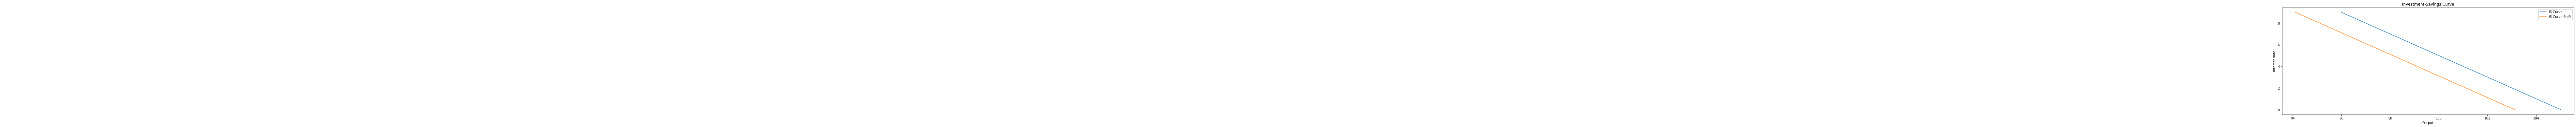

In [69]:
plot_IS_Curve()